In [82]:
# Importing necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, roc_curve, auc

In [83]:
# Reading in the csv file as a dataframe 'df' and previewing the first 5 rows
df = pd.read_csv('loan_default_data_set.csv')
original = df.copy()

pd.set_option('display.max_columns', None)

df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,0,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,0,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,0,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,2,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,0,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [84]:
# Checking for duplicate rows as well as displaying additional info about the dataset
print(f'There are {df.duplicated().sum()} duplicate rows\n')

print('Dataset information:')
df.info()

# There are 0 duplicate rows (would have been examined to determine why they exist and then either dropped or kept from there)
# The shape of the dataset is (2000 X 21)
# The columns 'pct_card_over_50_uti' and 'rep_income' contain about 2000 and 1500 rows with null values respectively 
# The dataset contains 20 numeric data types and 1 object data type ('rep_education')
# The 'rep_education' variable will be converted to be numeric for the models

There are 0 duplicate rows

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      20000 non-null  float64
 1   avg_bal_cards                    20000 non-null  float64
 2   credit_age                       20000 non-null  int64  
 3   credit_age_good_account          20000 non-null  int64  
 4   credit_card_age                  20000 non-null  int64  
 5   num_acc_30d_past_due_12_months   20000 non-null  int64  
 6   num_acc_30d_past_due_6_months    20000 non-null  int64  
 7   num_mortgage_currently_past_due  20000 non-null  int64  
 8   tot_amount_currently_past_due    20000 non-null  float64
 9   num_inq_12_month                 20000 non-null  int64  
 10  num_card_inq_24_month            20000 non-null  int64  
 11  num_card_12_month              

In [85]:
# Observing summary statistics for the numerical columns 
df.describe().round(2)

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind
count,20000.00,20000.00,20000.00,20000.0,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,18042.00,20000.00,18441.00,20000.0
mean,107439.03,12230.74,280.71,146.1,285.12,0.16,0.03,0.03,352.50,0.62,1.05,0.27,0.16,0.49,0.48,0.47,0.55,0.25,166373.90,0.1
std,22365.57,3060.43,73.24,38.6,64.26,0.47,0.18,0.17,1784.46,1.16,2.04,0.49,0.38,0.13,0.12,0.13,0.13,0.43,33444.97,0.3
min,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20000.00,0.0
25%,92212.56,10151.13,231.00,120.0,242.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.40,0.38,0.46,0.00,143504.24,0.0
50%,107711.03,12238.86,280.00,146.0,285.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.49,0.49,0.46,0.55,0.00,166462.90,0.0
75%,122751.43,14286.42,330.00,172.0,330.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.58,0.57,0.55,0.64,0.25,188903.52,0.0
max,200000.00,25000.00,560.00,300.0,550.00,5.00,2.00,1.00,35000.00,10.00,18.00,3.00,2.00,1.00,1.00,1.00,1.00,1.00,300000.00,1.0


The skew of "pct_card_over_50_uti" is -0.029
The skew of "rep_income" is -0.004



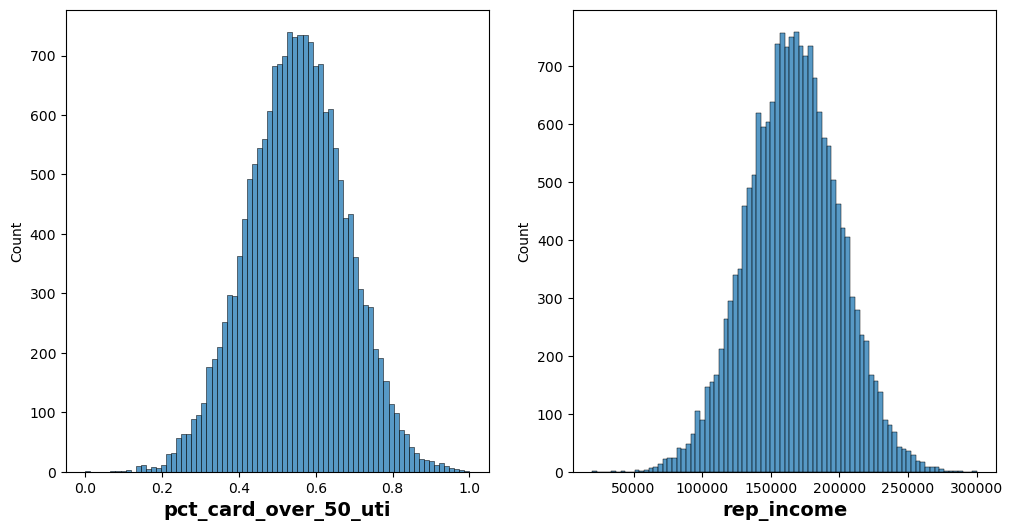

In [86]:
# Displaying the skew and the distributions in order to decide how to handle missing values
print(f'The skew of "pct_card_over_50_uti" is {df["pct_card_over_50_uti"].skew().round(3)}')
print(f'The skew of "rep_income" is {df["rep_income"].skew().round(3)}\n')

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.histplot(df['pct_card_over_50_uti'], ax = axes[0])
axes[0].set_xlabel('pct_card_over_50_uti', fontsize = 14, weight = 'bold')

sns.histplot(df['rep_income'], ax = axes[1])
axes[1].set_xlabel('rep_income', fontsize = 14, weight = 'bold')
plt.show()

# Both variables are normally distributed with minimal outliers
# Since outliers are not a factor, the mean will be used to fill missing values

In [87]:
# Filling NA values in the defined columns with their mean values 
df['pct_card_over_50_uti'].fillna(df['pct_card_over_50_uti'].mean(), inplace = True)
df['rep_income'].fillna(df['rep_income'].mean(), inplace = True)

# Dropping the singular row that contained a null value in the 'rep_education' column
df.dropna(inplace = True)

# Showing the updated summary 
df.info()

# Dataset now has a shape of (1999 X 21) and contains 0 null values

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      19999 non-null  float64
 1   avg_bal_cards                    19999 non-null  float64
 2   credit_age                       19999 non-null  int64  
 3   credit_age_good_account          19999 non-null  int64  
 4   credit_card_age                  19999 non-null  int64  
 5   num_acc_30d_past_due_12_months   19999 non-null  int64  
 6   num_acc_30d_past_due_6_months    19999 non-null  int64  
 7   num_mortgage_currently_past_due  19999 non-null  int64  
 8   tot_amount_currently_past_due    19999 non-null  float64
 9   num_inq_12_month                 19999 non-null  int64  
 10  num_card_inq_24_month            19999 non-null  int64  
 11  num_card_12_month                19999 non-null  int64  
 12  num_auto_ 36_month     

In [88]:
# Printing the updated summary statistics 
df.describe().round(2)

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind
count,19999.00,19999.00,19999.00,19999.0,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.00,19999.0
mean,107438.66,12230.58,280.71,146.1,285.12,0.16,0.03,0.03,352.51,0.62,1.05,0.27,0.16,0.49,0.48,0.47,0.55,0.25,166371.99,0.1
std,22366.07,3060.43,73.24,38.6,64.26,0.47,0.18,0.17,1784.50,1.16,2.04,0.49,0.38,0.13,0.12,0.13,0.12,0.43,32114.62,0.3
min,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20000.00,0.0
25%,92209.89,10151.12,231.00,120.0,242.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.40,0.38,0.48,0.00,145780.67,0.0
50%,107710.79,12238.82,280.00,146.0,285.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.49,0.49,0.46,0.55,0.00,166373.90,0.0
75%,122753.43,14286.16,330.00,172.0,330.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.58,0.57,0.55,0.63,0.50,186647.45,0.0
max,200000.00,25000.00,560.00,300.0,550.00,5.00,2.00,1.00,35000.00,10.00,18.00,3.00,2.00,1.00,1.00,1.00,1.00,1.00,300000.00,1.0


In [89]:
# Checking for class imbalance in the 'Def_ind' variable
def_count = df['Def_ind'].value_counts()
def_props = df['Def_ind'].value_counts(normalize = True).round(3)

pd.merge(def_count, def_props, on = 'Def_ind').reset_index()

# The classes are not balanced, about 90% of the observations did not default
# Imbalance problems can be resolved in many ways such as using different sampling methods (undersampling and oversampling), adjusting the threshold 
#    to be more precise, focusing more on other evaluation rather than accuracy, and by modifying class weights

,Def_ind,count,proportion
0,0,17999,0.9
1,1,2000,0.1


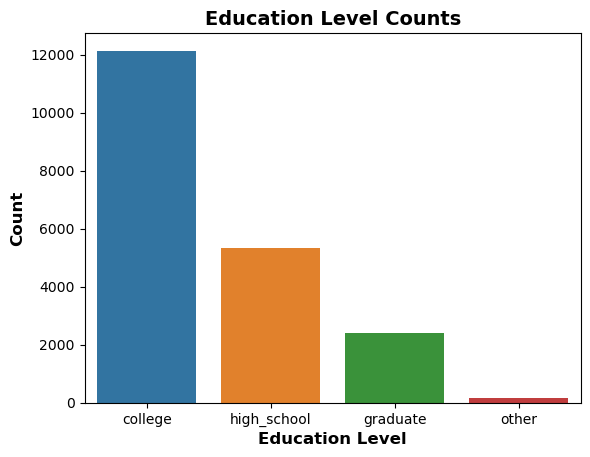

In [90]:
# Presenting the value counts for the 'rep_education' variable
rep_edu_counts = df.value_counts('rep_education').reset_index()

sns.barplot(x = rep_edu_counts['rep_education'], y = rep_edu_counts['count'], hue = rep_edu_counts['rep_education'])
plt.title('Education Level Counts', fontsize = 14, weight = 'bold')
plt.ylabel('Count', fontsize = 12, weight = 'bold')
plt.xlabel('Education Level', fontsize = 12, weight = 'bold')
plt.show()

# 4 distinct categories with 'college' being the most frequent
# The category 'other' is underrepresented in the data

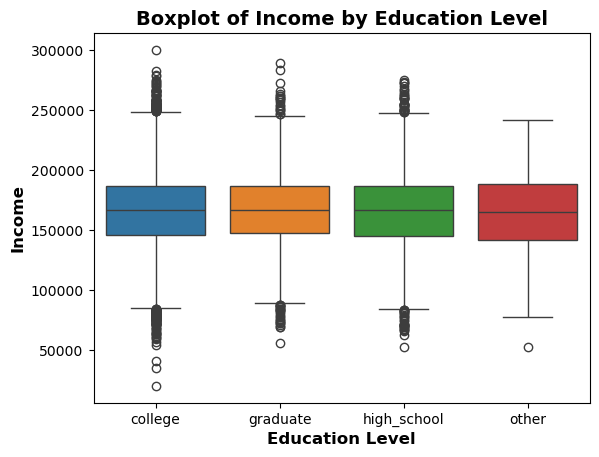

In [91]:
# Displaying boxplots of 'rep_income' by 'rep_education'
sns.boxplot(x = df['rep_education'], y = df['rep_income'], hue = df['rep_education'], legend = False)
plt.title('Boxplot of Income by Education Level', fontsize = 14, weight = 'bold')
plt.ylabel('Income', fontsize = 12, weight = 'bold')
plt.xlabel('Education Level', fontsize = 12, weight = 'bold')
plt.show()

# Income level doesn't appear to be strongly connected to education in the dataset

In [92]:
# Grouping by education level and getting the average default percentage for each level
df.groupby('rep_education')['Def_ind'].mean().round(3).sort_values(ascending = False).reset_index()

# When the highest education level is 'high school graduate,' the average chance of defaulting is approximately 11.6%

,rep_education,Def_ind
0,high_school,0.116
1,college,0.097
2,graduate,0.082
3,other,0.077


In [93]:
# Creating a numeric dataframe, 'df_num', by generating dummy variables for the 'rep_education' column to be used in the models
df_num = pd.get_dummies(df, columns = ['rep_education'], drop_first = True)

df_num['rep_education_graduate'] = df_num['rep_education_graduate'].astype(int)
df_num['rep_education_high_school'] = df_num['rep_education_high_school'].astype(int)
df_num['rep_education_other'] = df_num['rep_education_other'].astype(int)

df_num.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind,rep_education_graduate,rep_education_high_school,rep_education_other
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,0,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,0,0,0,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,0,0,0,0.490809,0.540671,0.418016,0.550964,0,89365.05765,0,0,0,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,0,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,0,0,0,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,2,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,0,0,0,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,0,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,0,1,0,0


In [94]:
# Defining the independent variables and standardizing them for the models
X = df_num.drop(columns = 'Def_ind')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.ascontiguousarray(X_scaled) 

# Defining the dependent variable
y = df_num['Def_ind']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .3, random_state = 23)

In [95]:
# Initializing the KNN model
knn = KNeighborsClassifier()

# Defining the parameter grid that includes every 3rd number between 1-100 for k as well as different weight options
param_grid = {
    'n_neighbors': np.arange(1, 101, 3),  
    'weights': ['uniform', 'distance']    
}

# Creating a custom F1-scorer that applies a threshold of 0.1 (Needed because GridSearchCV uses a default threshold of .5 for testing)
def f1_with_threshold(y_true, y_probs):
    if y_probs.ndim == 1:
        y_pred = (y_probs > 0.1).astype(int)
    else:
        y_pred = (y_probs[:, 1] > 0.1).astype(int)  
    return f1_score(y_true, y_pred)

# Making it a scorer for GridSearchCV
f1_scorer = make_scorer(f1_with_threshold, greater_is_better = True, needs_proba = True)

# Setting up GridSearchCV with the custom scorer and 3-fold cross-validation
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                           scoring = f1_scorer, cv = 3, n_jobs = -1, verbose = 1)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Printing the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Best model with optimal hyperparameters
best_knn_grid = grid_search.best_estimator_

# Setting the threshold to 0.1 for classification on the testing set
y_pred_probs_knn = best_knn_grid.predict_proba(X_test)[:, 1]
y_pred_classes_knn = (y_pred_probs_knn > 0.1).astype(int)

# Performance evaluation using F1-score
f1_best_knn_grid = f1_score(y_test, y_pred_classes_knn)

# Printing the final performance metrics
print(f'Best KNN F1-Score (Grid Search): {f1_best_knn_grid.round(3)}')

# Model had the best results when k = 100 and weight = uniform
# When using those hyperparameters, the model had an F1-score of .422 on average

Fitting 3 folds for each of 68 candidates, totalling 204 fits
Best Parameters: {'n_neighbors': 100, 'weights': 'uniform'}
Best KNN F1-Score (Grid Search): 0.422


Accuracy Score: 0.83
Precision Score: 0.321
Recall Score: 0.616
F1-Score: 0.422



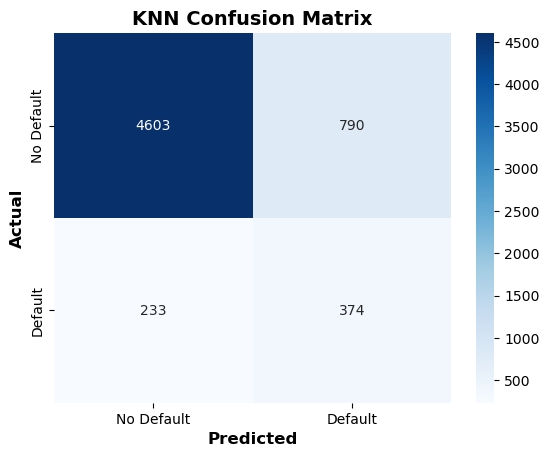

In [96]:
# Fitting the final model with k = 100 and using the default uniform weights
knn = KNeighborsClassifier(n_neighbors = 100, weights = 'uniform')

knn.fit(X_train, y_train)

# Gathering the predicted probabilities and then assigning them to classes with a threshold of 0.1
y_pred_probs_knn = knn.predict_proba(X_test)[:, 1]

y_pred_classes_knn = (y_pred_probs_knn > .1).astype(int)

# Calculating the performance metrics and printing them
accuracy = accuracy_score(y_test, y_pred_classes_knn)
precision = precision_score(y_test, y_pred_classes_knn)
recall = recall_score(y_test, y_pred_classes_knn)
f1 = f1_score(y_test, y_pred_classes_knn)

print(f'Accuracy Score: {accuracy.round(3)}')
print(f'Precision Score: {precision.round(3)}')
print(f'Recall Score: {recall.round(3)}')
print(f'F1-Score: {f1.round(3)}\n')

# Creating a confusion matrix of the results and displaying it using a heatmap
conf_mat = confusion_matrix(y_test, y_pred_classes_knn)

sns.heatmap(conf_mat, fmt = 'd', annot = True, cmap = 'Blues', xticklabels = ['No Default', 'Default'], yticklabels = ['No Default', 'Default'])
plt.title('KNN Confusion Matrix', fontsize = 14, weight = 'bold')
plt.xlabel('Predicted', fontsize = 12, weight = 'bold')
plt.ylabel('Actual', fontsize = 12, weight = 'bold')
plt.show()

# 4603 True Negatives
# 233 False Negatives
# 790 False Positives
# 374 True Positives

# KNN Results:
### Accuracy Score: 
- $.830$
- The model correctly predicted $83\%$ of the observations in the test set. <br>
### Precision Score:
- $.321$
- Of the observations predicted to default, only $32.1\%$ actually defaulted. <br>
### Recall Score:
- $.616$
- The model correctly identified $61.6\%$ of actual default cases. <br>
### F1-Score:
- $.422$
- A balance between precision and recall, measuring the model’s effectiveness in handling imbalanced classes.

### Key Takeaways:
- Since KNN is a non-parametric model, individual feature importance does not play a significant role in its results.
- Due to the high class imbalance, a $0.1$ threshold was used instead of the default $0.5$.
- While this lowered accuracy, it improved recall & F1-score, preventing the model from assigning all values to the majority class ($0$).
- F1-score was optimized when $k = 100$ and when weights = uniform.
- The model had moderate success generalizing effectively to new data.

In [98]:
# Defining the model and setting the random_state to ensure consistent results
dtc = DecisionTreeClassifier(random_state = 23)

# Defining the parameter distribution for random search
param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': randint(10, 100)
}

# Creating a custom F1-scorer that applies a threshold of 0.1 (Needed because RandomizedSearchCV uses a default threshold of .5 for testing)
def f1_with_threshold(y_true, y_probs):
    if y_probs.ndim == 1:
        y_pred = (y_probs > 0.1).astype(int)
    else:
        y_pred = (y_probs[:, 1] > 0.1).astype(int)  
    return f1_score(y_true, y_pred)

# Making it a scorer for GridSearchCV
f1_scorer = make_scorer(f1_with_threshold, greater_is_better = True, needs_proba = True)

# Setting up RandomizedSearchCV using 75 iterations and 3-fold cross-validation
random_search = RandomizedSearchCV(estimator = dtc, param_distributions = param_dist, n_iter = 75, cv = 3, scoring = f1_scorer, n_jobs = -1, verbose = 1, random_state = 23)

# Fitting the Randomized Search
random_search.fit(X_train, y_train)

# Printing the best parameters
print(f'Best Parameters: {random_search.best_params_}')

# Best model with optimal hyperparameters
best_dtc_random = random_search.best_estimator_

# Getting the predicted probabilities from the best model
y_pred_probs_dtc = best_dtc_random.predict_proba(X_test)[:, 1]

# Setting the threshold to 0.1 for classification
y_pred_classes_dtc = (y_pred_probs_dtc > 0.1).astype(int)

# Performance evaluation and displaying the optimized F1-score
f1_best_dtc_random = f1_score(y_test, y_pred_classes_dtc)

print(f'Best Decision Tree F1-Score (Random Search): {f1_best_dtc_random.round(3)}')

# # Model had the best results when criterion = gini, max_depth = 15, max_features = None, max_leaf_nodes = 95, min_samples_leaf = 12, min_samples_split = 12
# When using those hyperparameters, the model had an F1-score of .398 on average

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': 95, 'min_samples_leaf': 12, 'min_samples_split': 12}
Best Decision Tree F1-Score (Random Search): 0.398


Accuracy Score: 0.785
Precision Score: 0.277
Recall Score: 0.702
F1-Score: 0.398



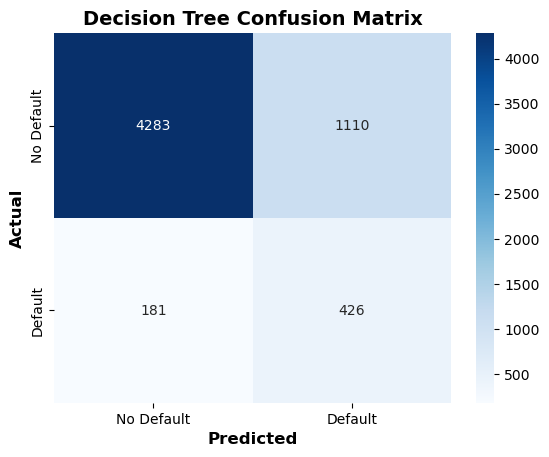

In [99]:
# Initializing the decision tree model and fitting it to the training data 
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, max_features = None, max_leaf_nodes = 95, min_samples_leaf = 12, min_samples_split = 12, random_state = 23)
dtc.fit(X_train, y_train)

# Gathering the predicted probabilities and using a threshold of 0.1 to assign them to classes 
y_pred_probs_dtc = dtc.predict_proba(X_test)[:, 1]

y_pred_classes_dtc = (y_pred_probs_dtc > .1).astype(int)

# Calculating the performance metrics and printing them
accuracy = accuracy_score(y_test, y_pred_classes_dtc)
precision = precision_score(y_test, y_pred_classes_dtc)
recall = recall_score(y_test, y_pred_classes_dtc)
f1 = f1_score(y_test, y_pred_classes_dtc)

print(f'Accuracy Score: {accuracy.round(3)}')
print(f'Precision Score: {precision.round(3)}')
print(f'Recall Score: {recall.round(3)}')
print(f'F1-Score: {f1.round(3)}\n')

# Generating a confusion matrix of the results and displaying it using a heatmap
conf_mat = confusion_matrix(y_test, y_pred_classes_dtc)

sns.heatmap(conf_mat, fmt = 'd', annot = True, cmap = 'Blues', xticklabels = ['No Default', 'Default'], yticklabels = ['No Default', 'Default'])
plt.title('Decision Tree Confusion Matrix', fontsize = 14, weight = 'bold')
plt.xlabel('Predicted', fontsize = 12, weight = 'bold')
plt.ylabel('Actual', fontsize = 12, weight = 'bold')
plt.show()

# 4283 True Negatives
# 181 False Negatives
# 1110 False Positives
# 426 True Positives

In [100]:
# Getting the feature importances from the trained decision tree model
feature_importance_dtc = dtc.feature_importances_.round(3)

# Creating a dataframe to display the feature names along with the feature importances, sorting them by importance, and printing the results
feature_importance_df = pd.DataFrame({'Feature': df_num.drop(columns = 'Def_ind').columns, 
                                      'Importance': feature_importance_dtc}).sort_values(by = 'Importance', ascending = False)
feature_importance_df

# 'avg_bal_cards' and 'num_acc_30d_past_due_12_months' had the highest importances and several features were tied for the lowest importance

,Feature,Importance
1,avg_bal_cards,0.306
5,num_acc_30d_past_due_12_months,0.226
13,uti_open_card,0.188
9,num_inq_12_month,0.087
14,pct_over_50_uti,0.035
4,credit_card_age,0.033
2,credit_age,0.031
3,credit_age_good_account,0.030
10,num_card_inq_24_month,0.019
16,pct_card_over_50_uti,0.012


# Decision Tree Results:
### Accuracy Score: 
- $.785$
- The model correctly predicted $78.5\%$ of the observations in the test set. <br>
### Precision Score:
- $.277$
- Of the observations predicted to default, only $27.7\%$ actually defaulted. <br>
### Recall Score:
- $.702$
- The model correctly identified $70.2\%$ of actual default cases. <br>
### F1-Score:
- $.398$
- A balance between precision and recall, measuring the model’s effectiveness in handling imbalanced classes.

### Key Takeaways:
- The variables **avg_bal_cards** ($.306$) and **num_acc_30d_past_due_12_months** ($.226$) had the highest importances and multiple features were tied for being the least important.
- Due to the high class imbalance, a $0.1$ threshold was used instead of the default $0.5$.
- While this lowered accuracy, it improved recall & F1-score, preventing the model from assigning all values to the majority class ($0$).
- The model struggled to generalize effectively to new data, suggesting potential overfitting or a need for further tuning.

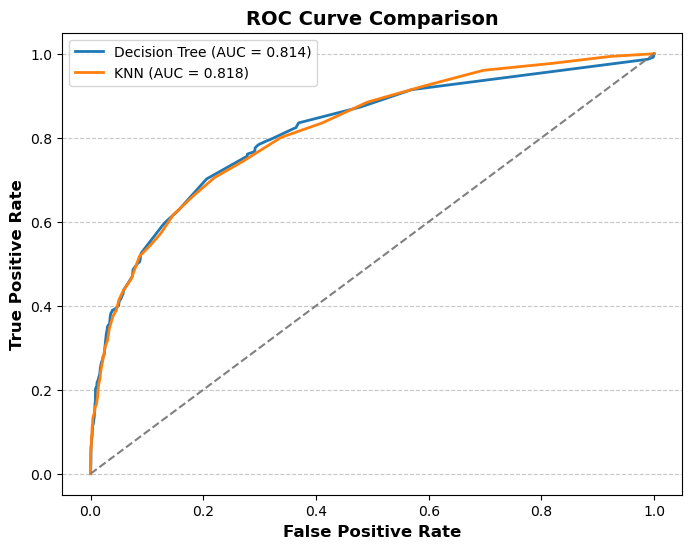

In [102]:
# Obtaining the false positive rate and the true positive rate from both models 
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_probs_dtc)  
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_probs_knn)  

# Calculating the AUC score each model
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the ROC Curves
plt.figure(figsize = (8, 6))
plt.plot(fpr_dtc, tpr_dtc, label = f'Decision Tree (AUC = {roc_auc_dtc.round(3)})', linewidth = 2)
plt.plot(fpr_knn, tpr_knn, label = f'KNN (AUC = {roc_auc_knn.round(3)})', linewidth = 2)
plt.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')  
plt.grid(axis = 'y', linestyle = '--', alpha = .7)
plt.title('ROC Curve Comparison', fontsize = 14, weight = 'bold')
plt.xlabel('False Positive Rate', fontsize = 12, weight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 12, weight = 'bold')
plt.legend()
plt.show()

# KNN was the slightly better model according to the ROC Curve and the AUC score (.818)

# Summary:
### Recap:
- Two classification models, K-Nearest Neighbors (KNN) and Decision Tree, were tested to determine which was more effective at predicting whether an account would default.
- Both models were trained on standardized data from the 'loan_default_data' dataset, which was split into training and testing sets.
- Hyperparameters for the models were selected using GridSearchCV for KNN and RandomizedSearchCV for the Decision Tree.
- Performance was evaluated using accuracy, precision, recall, F1-score, ROC curves, and AUC scores, with a primary focus on F1-score, ROC curves, and AUC score.
- A lower classification threshold ($0.1$) was used to address the class imbalance in the dependent variable 'Def_ind'.
### Model Comparison:
- Based on the performance metrics and AUC scores, Both models performed moderately well at generalizing new data.
- The KNN model had a slightly higher AUC score ($.818$), F1-score ($.422$), precision score ($.321$), and accuracy score ($.830$).
- The Decision Tree Model had nearly the same AUC score ($.814$) and had the higher recall score ($.702$). 
- These results suggest that both models perform similarly in predicting new data, with no significant advantage of one over the other. The choice of the final model depends on the specific priority. For example, if the goal is to identify as many defaults as possible, the Decision Tree model, which has a higher recall, would be preferable. Conversely, if the priority is ensuring that predicted defaults are more likely to be actual defaults, the KNN model, with its higher precision, would be the better choice.